Experiment with  Neural Networks on the Fashion MNIST dataset . 

According to their [ github page](https://github.com/zalandoresearch/fashion-mnist) , the Fashion MNIST  aims to replace the classic MNIST dataset, which is quite overused and not complex enough for modern algorithms. It consists of  70,000  grayscale images of clothing items , 60,000 for the training set and 10,000 for the test set.

There are 10 clothing categories and each article is a 28 by 28 pixels image. 

First a simple NN is trained  inspired by this [TensorFlow turorial](https://www.tensorflow.org/tutorials/keras/basic_classification ), following by  a CNN, to compare the accuracy of each model.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
warnings.filterwarnings(action='ignore')

In [0]:
# Import and load fashion MNIST data direclty from keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Exploratory data analysis

In [5]:
# Explore dataset

print("Training set: ", train_images.shape)
print("Test set: ", test_images.shape)

Training set:  (60000, 28, 28)
Test set:  (10000, 28, 28)


Each label is an integer (0-9) and corresponds to a class (a category of clothing). 

The names of the classes can be found here: https://github.com/zalandoresearch/fashion-mnist 



In [0]:
# Define class names 

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

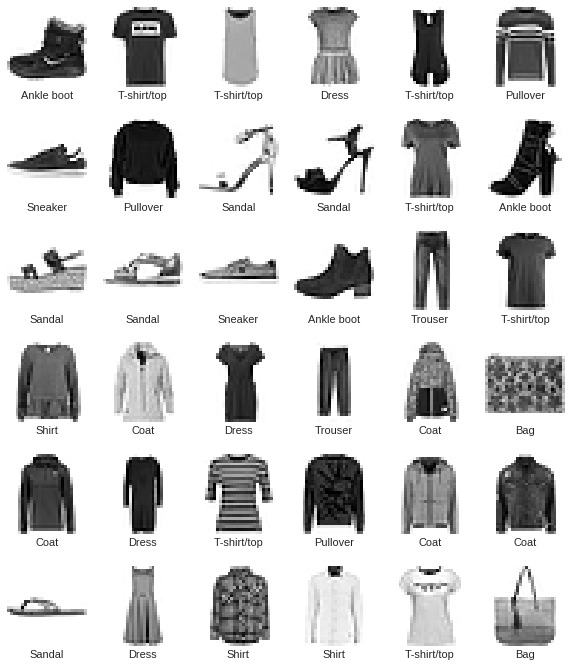

In [7]:
# Display the first 36 images with the corresponding label

plt.figure(figsize=(10,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

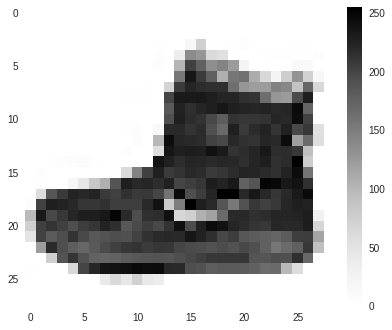

In [8]:
# Check image range of values

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

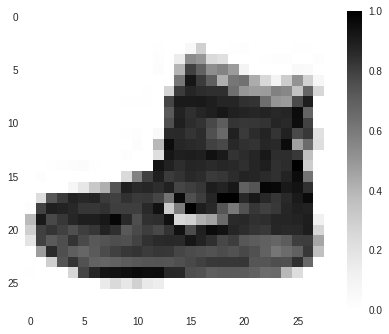

In [9]:
# Data normalization

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
# Define models and set-up layers


def createNN():
  
    model = Sequential()
  
    # This layer transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array 
    # of 28 * 28 = 784 pixels. It has no parameters to learn, it only reformats the data by unstacking 
    # rows of pixels in the image and lining them up.
    model.add(Flatten(input_shape=(28, 28)))

    # The following are densely-connected, or fully-connected, neural layers. 

    # The first Dense layer has 128 nodes (or neurons). Each node contains a score that indicates the 
    # probability that the current image belongs to one of the 10 classes.
    # ReLU: Rectified Linear Activation, works well as an activation function in neural networks.
    model.add(Dense(128, activation='relu')) 

    # The last layer is a 10-node softmax layer, returns an array of 10 probability scores that sum to 1. 
    model.add(Dense(10, activation='softmax'))
    
    model.summary()
    
    return model
  

  
def createCNN():

  model = Sequential()

  # The Conv2D layers are convolution layers that will deal with the input images, 
  # which are 2-dimensional matrices.
  # The first Conv2D layer has 64 nodes and  the second 32.
  # Kernel size is the size of the filter matrix for our convolution, 
  # here kernel size 2 means a 2x2 filter matrix.

  model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  
  model.summary()
  
  return model





In [11]:
# Create a NN and a CNN model

NN  = createNN()
CNN = createCNN()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_______________

Now we will compile the models. We need to specify the following three parameters:

  1) Optimizer: tries to minimize the loss function.

  2) Loss function:  measures how accurate the model is during training. 

  3) Metrics: monitor the training and testing steps.

1.   List item
2.   List item



In [0]:
# Compile model


NN.compile(
              # adam: adaptive moment estimation, 
              # another way of using past gradients to calculate current gradients.
              optimizer='adam',
              
              # sparse as the items are not one-key hot encoded.
              loss='sparse_categorical_crossentropy', 
              
              # accuracy: the fraction of the images that are correctly classified.
              metrics=['accuracy'])


CNN.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
# Train the NN model

NN.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5 )  
   

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.5008 - acc: 0.8240 - val_loss: 0.4364 - val_acc: 0.8476
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3800 - acc: 0.8640 - val_loss: 0.3897 - val_acc: 0.8596
Epoch 3/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.3385 - acc: 0.8770 - val_loss: 0.3704 - val_acc: 0.8681
Epoch 4/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.3147 - acc: 0.8844 - val_loss: 0.3884 - val_acc: 0.8595
Epoch 5/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.2957 - acc: 0.8914 - val_loss: 0.3471 - val_acc: 0.8757


In [14]:
# Create reshaped copy data to fit into the CNN model

train_X = train_images.reshape(60000,28,28,1)
test_X = test_images.reshape(10000,28,28,1)
  
# Train the CNN model

CNN.fit(train_X, train_labels, batch_size=64, validation_data=(test_X, test_labels), epochs=5 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 103s 2ms/step - loss: 0.5828 - acc: 0.7852 - val_loss: 0.3740 - val_acc: 0.8643
Epoch 2/5
60000/60000 [==============================] - 103s 2ms/step - loss: 0.3996 - acc: 0.8545 - val_loss: 0.3404 - val_acc: 0.8786
Epoch 3/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.3564 - acc: 0.8710 - val_loss: 0.2984 - val_acc: 0.8915
Epoch 4/5
60000/60000 [==============================] - 103s 2ms/step - loss: 0.3296 - acc: 0.8785 - val_loss: 0.2848 - val_acc: 0.8941
Epoch 5/5
60000/60000 [==============================] - 101s 2ms/step - loss: 0.3143 - acc: 0.8854 - val_loss: 0.2791 - val_acc: 0.8936


In [17]:
# NN model evaluation

# Check overall training set accuracy

train_loss, train_acc = NN.evaluate(train_images, train_labels)
print('NN train accuracy:', train_acc)

# Evaluate accuracy on the test dataset

test_loss, test_acc = NN.evaluate(test_images, test_labels)
print('NN test accuracy:', test_acc)





60000/60000 [==============================] - 2s 37us/step
NN train accuracy: 0.9016333333333333
10000/10000 [==============================] - 0s 35us/step
NN test accuracy: 0.8757


In [18]:
# CNN model evaluation

# Check overall training set accuracy

train_loss, train_acc = CNN.evaluate(train_X, train_labels)
print('CNN train accuracy:', train_acc)

# Evaluate accuracy on the test dataset

test_loss, test_acc = CNN.evaluate(test_X, test_labels)
print('CNN test accuracy:', test_acc)

60000/60000 [==============================] - 21s 347us/step
CNN train accuracy: 0.9108333333333334
10000/10000 [==============================] - 3s 348us/step
CNN test accuracy: 0.8936


A gap between training accuracy and test accuracy in the simple NN model can be noticed. This is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

In [0]:
# Once the model is trained, we can make predictions

predictionsNN = NN.predict(test_images)
predictionsCNN = CNN.predict(test_X)

Explore results

In [21]:
# A prediction is an array of 10 numbers. These describe the "confidence" of the model 
# that the image corresponds to each of the 10 different articles of clothing.

print("For the first image of the test set, return the confidence that the item belongs to each of the 10 classes:\n\n", predictionsNN[0])


For the first image of the test set, return the confidence that the item belongs to each of the 10 classes:
 [1.3628625e-05 2.6171662e-07 1.4757349e-07 4.8986533e-07 3.6242244e-07
 3.0810374e-03 1.2277840e-06 1.4188917e-01 2.3839220e-06 8.5501128e-01]


In [22]:
# We can see which label has the highest confidence value

print("Predicted label is:", classes[np.argmax(predictionsNN[0])])

# Check is the predicted label corresponds to the true label

print ("True label is:",classes[test_labels[0]])

Predicted label is: Ankle boot
True label is: Ankle boot


In [0]:
# Visualize predictions

green = '#4FC67C'
red   = '#DB6B62'

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = green
  else:
    color = red
  
  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color(red)
  thisplot[true_label].set_color(green) 

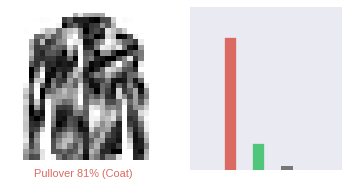

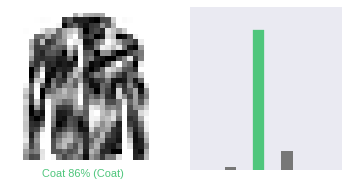

In [25]:
# Predict again for an image

i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictionsNN, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictionsNN,  test_labels)
plt.show()


plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictionsCNN, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictionsCNN,  test_labels)
plt.show()





Predictions using a simple Neural Network


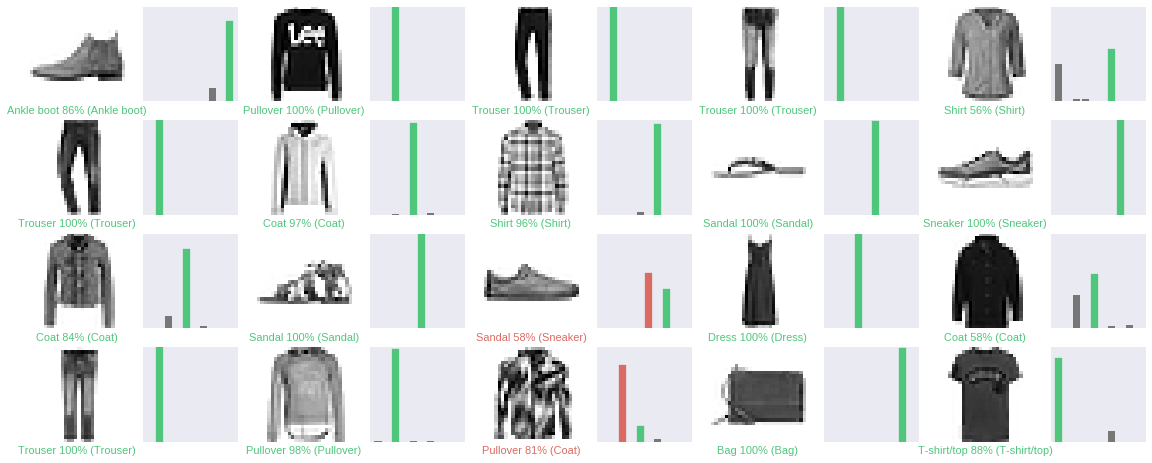

Precitions using a simple Convolutional Neural Network


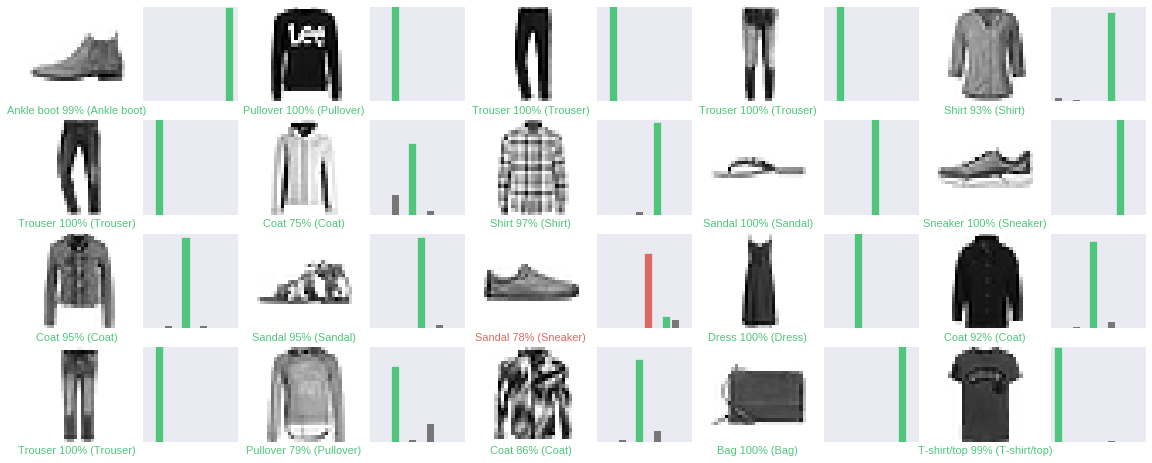

In [26]:
# Plot the first 20 test images, their predicted label, and the true label for each model
# Color correct predictions in green, incorrect predictions in red

num_rows = 4
num_cols = 5
num_images = num_rows*num_cols

print("Predictions using a simple Neural Network")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionsNN, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionsNN, test_labels)

plt.show()

print("Precitions using a simple Convolutional Neural Network")

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionsCNN, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionsCNN, test_labels)
plt.show()

(1, 28, 28)
(1, 28, 28, 1)


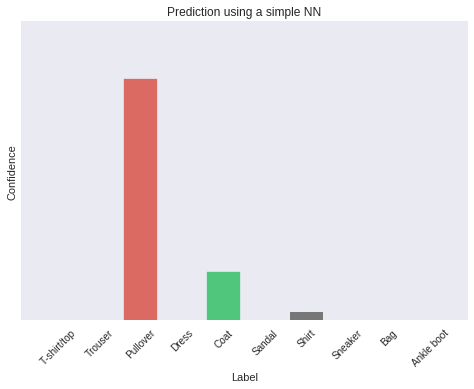

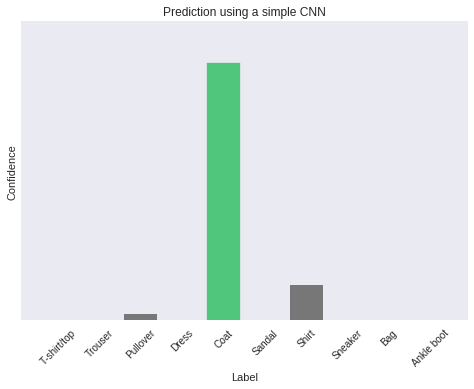

True label is: Coat


In [27]:
# Make prediction about a single image

i = 17

img = test_images[i]
imgx = test_X[i]

# Even though we're using a single image, we need to add it to a list because tf.keras models are 
# optimized to make predictions on a batch, or collection, of examples at once.
# Here we add the image to a batch where it's the only member.

img = (np.expand_dims(img,0))
imgx = (np.expand_dims(imgx,0))

print(img.shape)
print(imgx.shape)

# Predict

predictionNN = NN.predict(img)
predictionCNN = CNN.predict(imgx)


# Plot

plt.title("Prediction using a simple NN")
plt.ylabel("Confidence")
plt.xlabel("Label")
plot_value_array(i, predictionsNN, test_labels)
plt.xticks(range(10), classes, rotation=45)
plt.show()

plt.title("Prediction using a simple CNN")
plt.ylabel("Confidence")
plt.xlabel("Label")
plot_value_array(i, predictionsCNN, test_labels)
plt.xticks(range(10), classes, rotation=45)
plt.show()


print ("True label is:", classes[test_labels[i]])


